# Data Visualization & Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os, sys

sys.path.append('./hazard_prediction/')
from dataloader import HazardAudicor10sLoader
from dataloader import HazardBigExamLoader

%matplotlib inline

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


In [3]:
def plot_pie(title, n_subject_with_event, n_subject_without_event):
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=20)
    plt.pie([n_subject_with_event, n_subject_without_event], labels=['# of subjects with events', '# of subjects without events'], autopct='%1.1f%%', textprops={'fontsize': 14})
    plt.show()
    
def plot_hist(title, survival_times):
    plt.figure(figsize=(20, 10))
    plt.title(title)
    counts, bins, _ = plt.hist(survival_times, bins=20, rwidth=0.9)
    plt.xticks(bins, bins.astype(int))

    plt.xlabel('Event Times (days)')
    plt.ylabel('# of Signals')
    plt.show()

## Big Exam

In [4]:
class HazardBigExamConfig():
    def __init__(self):
        self.big_exam_ekg_channels = [0, 1, 2, 3, 4, 5, 6, 7]
        self.big_exam_hs_channels = [8, 9]
        self.big_exam_only_train = False
        self.n_ekg_channels = 8
        self.n_hs_channels = 2
        self.sampling_rate = 1000
        self.downsample = 'direct'
        self.with_normal_subjects = True
        self.events = ['ADHF', 'Mortality', 'MI', 'Stroke', 'CVD']

loader = HazardBigExamLoader(HazardBigExamConfig())

In [5]:
print('Number of normal subjects:', np.unique(loader.load_subject_id(is_normal=True)).shape[0])
print('Number of normal subjects:', loader.load_normal_X().shape[0])

print('Number of abnormal subjects:', np.unique(loader.load_subject_id(is_normal=False)).shape[0])
print('Number of abnormal signals:', loader.load_abnormal_X().shape[0])

Number of normal subjects: 601
Number of normal subjects: 601
Number of abnormal subjects: 226
Number of abnormal signals: 795


In [6]:
longest_event_time = 0
y = loader.load_abnormal_y()

for i in range(5):
    longest_event_time = max(longest_event_time, 
                            y[y[:, i, 0] == 1, i, 1].max())
print('longest event time: {} days'.format(longest_event_time.astype(int)))

longest event time: 2048 days


## Audicor_10s

In [7]:
# load data
normal_filenames = np.load('./data/audicor_10s/normal_filenames.npy')
abnormal_filenames = np.load('./data/audicor_10s/abnormal_filenames.npy')

In [8]:
print('Number of normal signals:', normal_filenames.shape[0])
print('Number of abnormal signals:', abnormal_filenames.shape[0])

Number of normal signals: 340
Number of abnormal signals: 776


In [9]:
abnormal_subject_ids = np.vectorize(lambda s: (s.split('/')[-1]).split('_')[0])(abnormal_filenames)
print('Number of abnormal subjects:', np.unique(abnormal_subject_ids).shape[0])

Number of abnormal subjects: 211


In [10]:
class HazardAudicor10sConfig():
    def __init__(self):
        self.audicor_10s_ekg_channels = [0]
        self.audicor_10s_hs_channels = [1]
        self.audicor_10s_only_train = False
        self.n_ekg_channels = 1
        self.n_hs_channels = 1
        self.sampling_rate = 500
        self.downsample = 'direct'
        self.with_normal_subjects = True
        self.events = ['ADHF', 'Mortality']

loader = HazardAudicor10sLoader(HazardAudicor10sConfig())

In [11]:
y = loader.load_abnormal_y()
y.shape

(776, 2, 2)

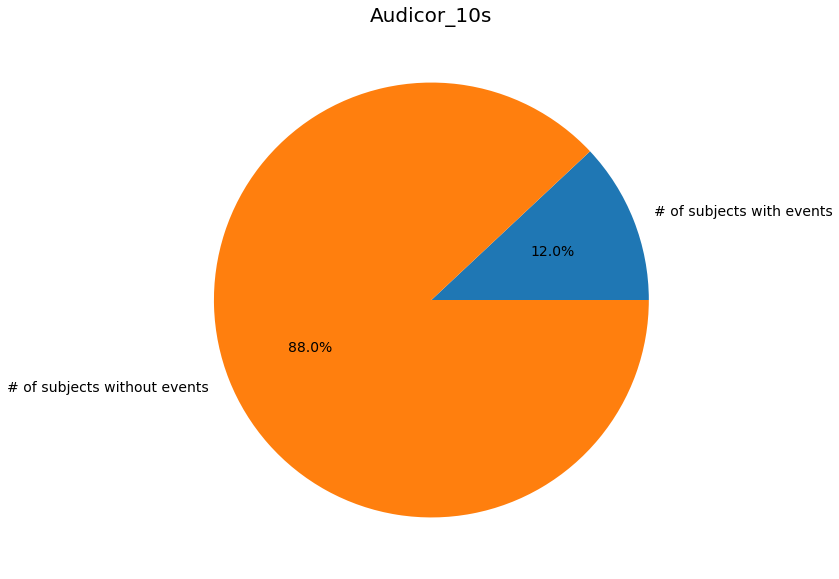

In [12]:
n_subject_with_event = (y[:, 0, 0] == 1).sum() + (y[:, 1, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s', 
            n_subject_with_event,
            n_subject_without_event)

In [13]:
print('longest event time:', int(max(y[y[:, 0, 0] == 1, 0, 1].max(), y[y[:, 1, 0] == 1, 1, 1].max())), 'days')

longest event time: 322 days


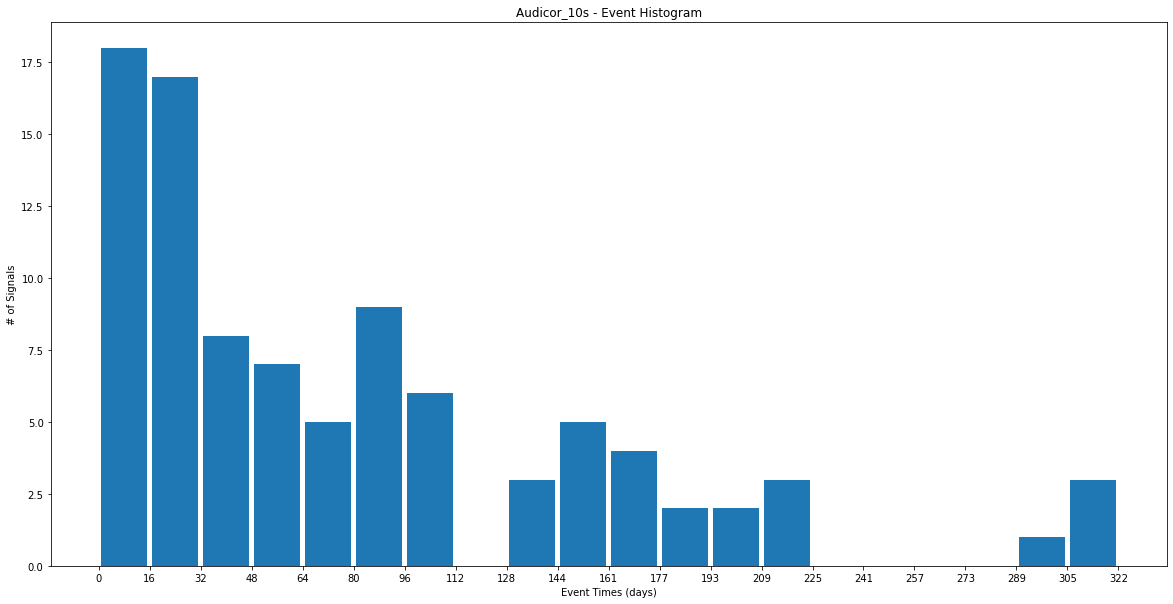

In [14]:
ADHF_survival_times = y[y[:, 0, 0] == 1, 0, 1]
Mortality_survival_times = y[y[:, 1, 0] == 1, 1, 1]

total_survival_times = np.append(ADHF_survival_times, Mortality_survival_times)
plot_hist('Audicor_10s - Event Histogram', total_survival_times)

### ADHF

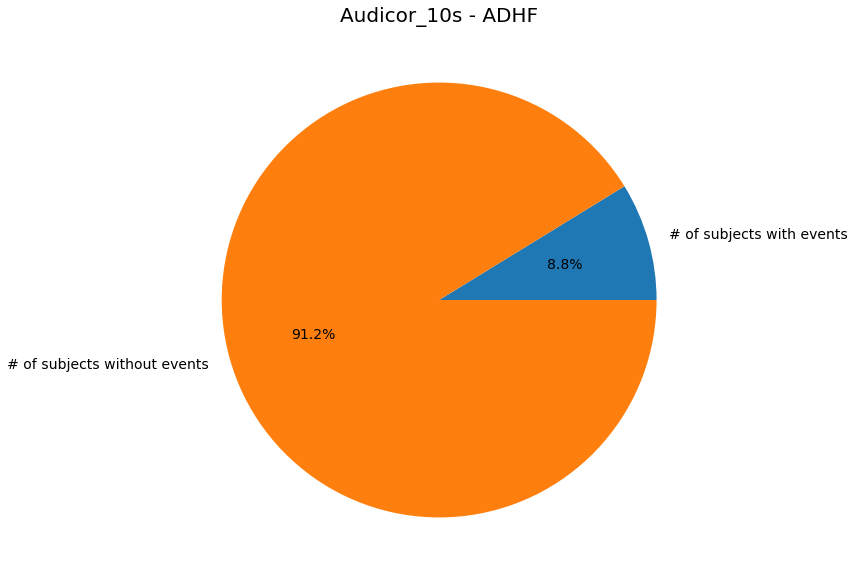

In [15]:
n_subject_with_event = (y[:, 0, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s - ADHF', 
            n_subject_with_event,
            n_subject_without_event)

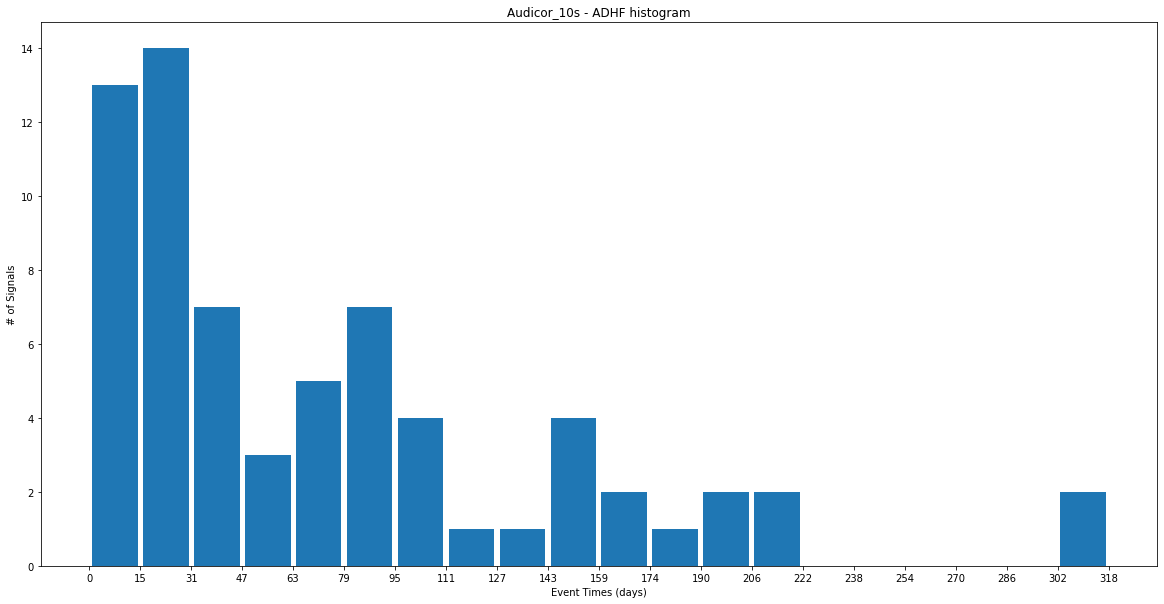

In [16]:
plot_hist('Audicor_10s - ADHF histogram', ADHF_survival_times)

### Mortality

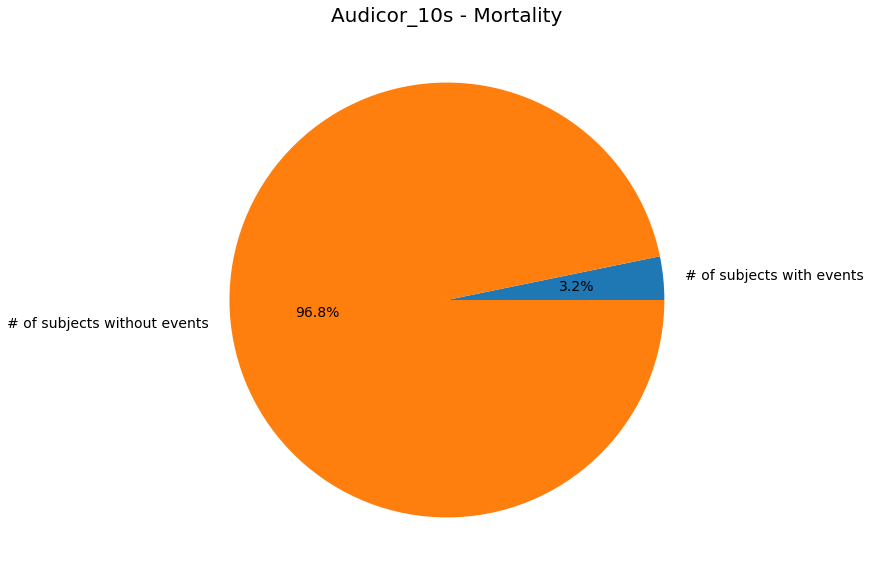

In [17]:
n_subject_with_event = (y[:, 1, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s - Mortality', 
            n_subject_with_event,
            n_subject_without_event)

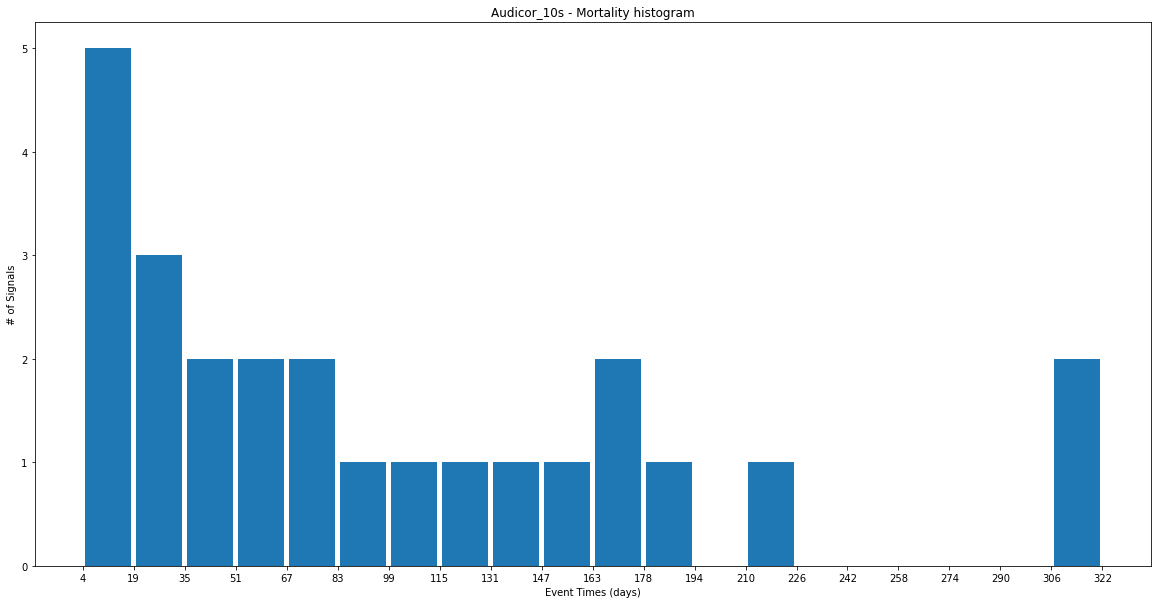

In [18]:
plot_hist('Audicor_10s - Mortality histogram', Mortality_survival_times)

Text(0, 0.5, 'survival time(days)')

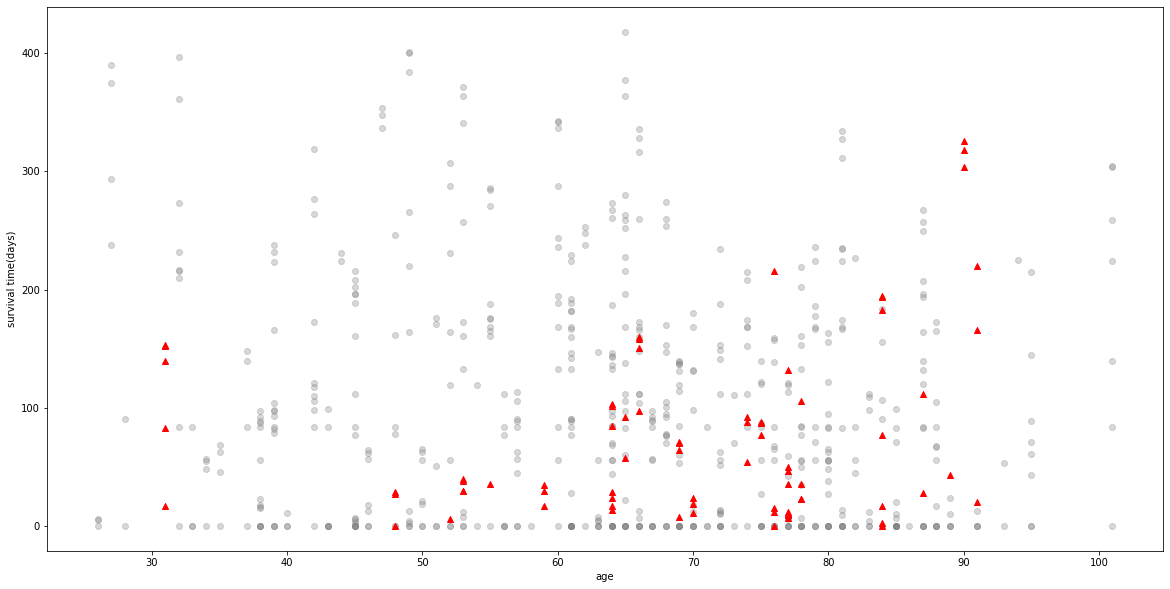

In [95]:
event_mask = (abnormal_event.ADHF_censoring_status == 1)
plt.figure(figsize=(20, 10))
plt.scatter(abnormal_event.age[~event_mask], abnormal_event.ADHF_survival_time[~event_mask], marker='o', color='grey', alpha=0.3)
plt.scatter(abnormal_event.age[event_mask], abnormal_event.ADHF_survival_time[event_mask], marker='^', color='red')
plt.xlabel('age')
plt.ylabel('survival time(days)')

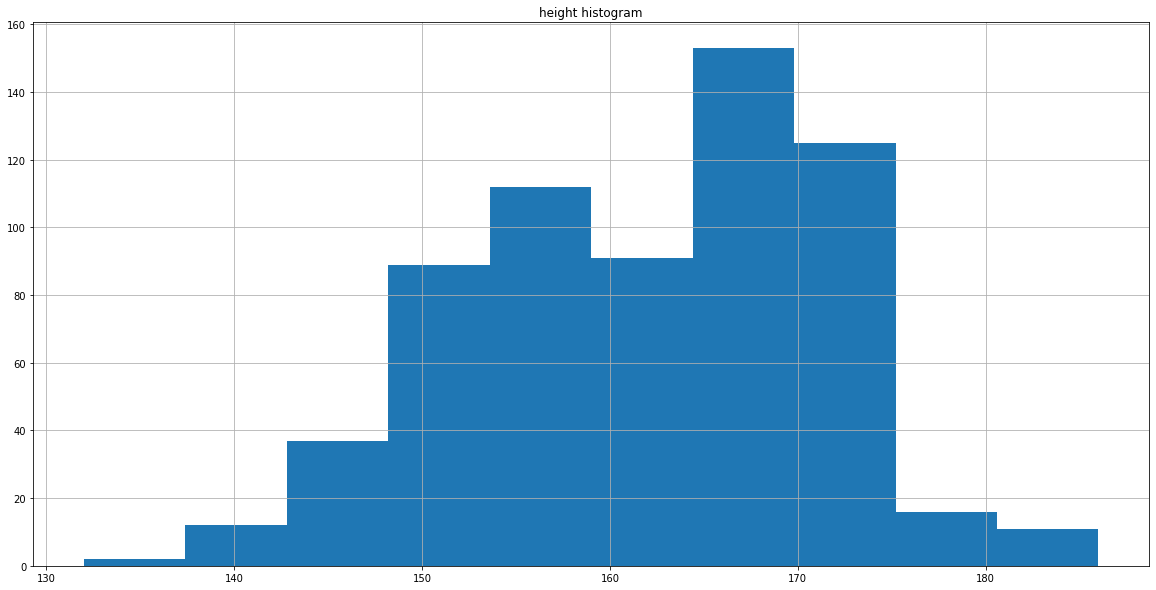

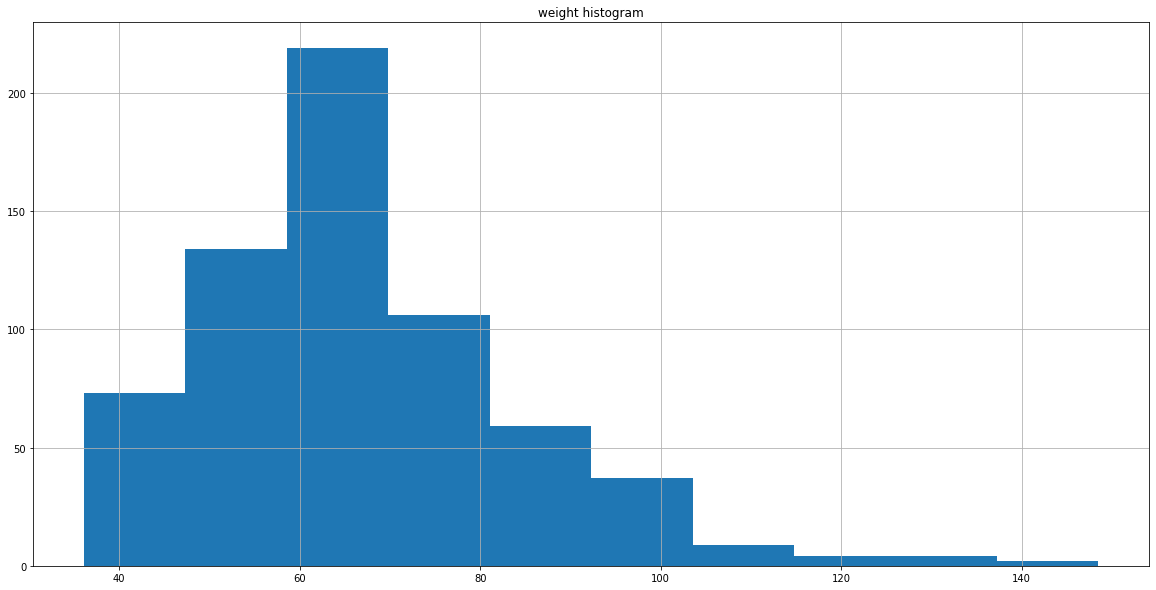

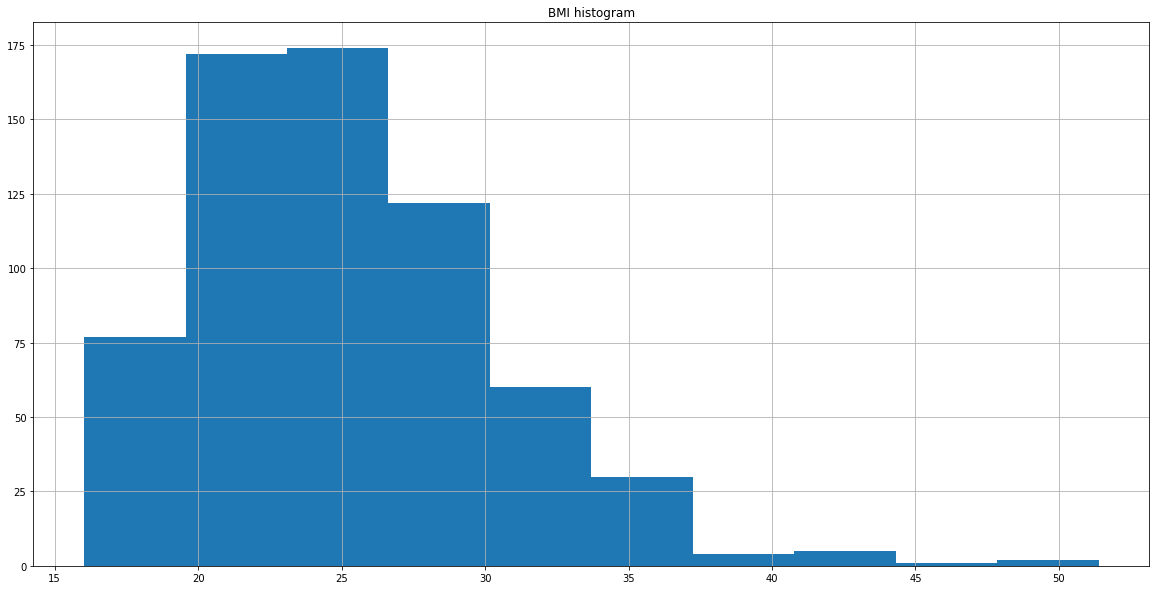

In [110]:
ax = abnormal_event.height.hist(figsize=(20, 10))
ax.set_title('height histogram')
plt.show()

ax = abnormal_event.weight.hist(figsize=(20, 10))
ax.set_title('weight histogram')
plt.show()

ax = abnormal_event.BMI.hist(figsize=(20, 10))
ax.set_title('BMI histogram')
plt.show()